In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
os.getcwd()
os.listdir('.')
print(os.getcwd())
print(os.chdir('/content/drive/MyDrive/Proj_colab'))


/content/drive/MyDrive/Proj_colab
None


In [ ]:
# %% Read the original data and drop the columns
originalD = pd.read_csv('data/Original_data.csv', low_memory=False)
#originalD = pd.read_csv('data/Original_data.csv', low_memory=False)
original_F = originalD.drop(['birthyr','faminc','employ','marstat','child18','pid3','pid7','votereg','presvote16post','ideo5','newsint','inputstate'], axis = 1)
original_F


In [ ]:
# %% Read the breached  data and drop the columns
breachD = pd.read_csv('data/breached_data.csv', low_memory=False)

breach_F = breachD.drop(['Title','Domain','Name','BreachDate','AddedDate','ModifiedDate','IsVerified','IsFabricated','IsSensitive','IsActive','IsRetired','PwnCount','LogoType','DataClasses'], axis = 1)
#breach_F = breachD.drop(['Title','Domain','Name','BreachDate','AddedDate','ModifiedDate','IsVerified','IsFabricated','IsSensitive','IsActive','PwnCount','IsRetired','IsSpamList','LogoType','DataClasses'], axis = 1)
#breach_F['IsSpamList'] = breach_F['IsSpamList'].fillna(0)
breach_F.loc[:,'Breached'] ='1'
breach_F["Breached"] = breach_F["Breached"].astype(object).astype(int)
#df["a"] = df["a"].astype(str).astype(int)
print(breach_F.dtypes)
breach_F

In [ ]:
breach_F1 = breach_F.drop_duplicates(subset =["id"] )




In [ ]:
breach_F1["Breached"].replace({1: 0})
#df["column1"].replace({"a": "x", "b": "y"}, inplace=True)
#breach_F = breach_
#breach_F.loc[:,'Breached'] ='1'
breach_F1

,id,IsSpamList,Breached
0,135664815,0,0
1,355286483,1,0
4,339141795,0,0
5,341961164,1,0
6,374206867,1,0
...,...,...,...
14960,137327203,1,0
14963,334328189,1,0
14967,151192859,1,0
14973,152094711,1,0


In [ ]:
df3 = pd.merge(breach_F, breach_F1, how='outer')
#pd.merge(df6, df7, how='inner')
#df3.groupby("Breached").sum()
#df3.loc[fin_dat['Breached'] == 1]
df3

In [ ]:
def get_last_digits(num, last_digits_count=2):
    return abs(num) % (10**last_digits_count)
    #       ^ perform `%` on absolute value to cover `-`ive numbers

In [ ]:
get_last_digits(fin_dat1.id.values)

array([39, 39, 10, ...,  2,  2, 24])

In [ ]:
# %% Merge the two files
fin_dat = pd.merge(original_F, df3, on='id', how='inner')
print("Number of rows in the final dataset: ", fin_dat.shape[0])
#print(fin_dat.describe)
#fin_dat['IsspamList'] = fin_dat['IsSpamList'].replace(np.nan, 0)
#print(fin_dat.replace(r'^\s*$', np.nan, regex=True))
#fin_dat1 = fin_dat.replace(np.nan, 0)

exists = 1 in fin_dat.Breached
print(exists)
fin_dat.head(5)
#fin_dat.iloc [0:5,[1,4]]


In [ ]:
print(fin_dat.dtypes)

id            int64
gender        int64
race          int64
educ          int64
region        int64
IsSpamList    int64
Breached      int64
dtype: object


In [ ]:
a = int(input())
print(a % 100)

In [ ]:
import pandas as pd
#housing = pd.read_csv("/sample_data/california_housing.csv")
#print(housing.head())
 #fin_dat = pd.merge(original_F, breach_F, on='id', how='left')
#output
y= fin_dat.Breached
#y= get_last_digits(fin_dat1.id.values)
 
#input

x=fin_dat.drop('Breached',axis=1)
#x=fin_dat1.drop('id',axis=1)

#splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
 
#printing shapes of testing and training sets :
print("shape of original dataset :", fin_dat.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)


In [ ]:
# prepare configuration for cross validation test harness
seed = 6

In [ ]:

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [ ]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.783407 (0.013375)
LDA: 0.783407 (0.013375)
KNN: 0.761441 (0.012177)
CART: 0.568841 (0.008941)
NB: 0.783407 (0.013375)
SVM: 0.783407 (0.013375)


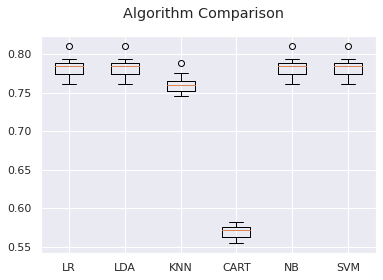

In [ ]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
CATEGORICAL_COLUMNS = ['gender', 'race', 'educ', 'region']
#NUMERIC_COLUMNS = ['gender', 'race','educ','region']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = x_train[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

#for feature_name in NUMERIC_COLUMNS:
 #feature_columns.append(tf.feature_column.numeric_column(feature_name))

print(feature_columns)

[VocabularyListCategoricalColumn(key='gender', vocabulary_list=(1, 2), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='race', vocabulary_list=(1, 6, 3, 2, 4, 5, 7, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='educ', vocabulary_list=(2, 3, 4, 5, 6, 1), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='region', vocabulary_list=(3, 2, 4, 1), dtype=tf.int64, default_value=-1, num_oov_buckets=0)]


In [ ]:

# There are three steps to model something with sklearn
# 1. Set up the model

model1 = LinearRegression()
# 2. Use fit
model1.fit(x_train,y_train)
#model.fit(x_train, y_train)
# 3. Check the score
model1.score(x_test, y_test)

0.027958539666352977

In [ ]:
model1.coef_ # Get the coefficients, beta

array([-6.02393417e-11,  5.06434938e-04, -4.66357312e-03,  6.03379831e-03,
       -1.50103997e-03, -1.18445630e-01])

In [ ]:
# %% some people's emails are not part of the breach but join produces NaNs for them. We swap them with 0s
fin_dat['pwn'] = pd.notna(fin_dat['PwnCount'])
print(fin_dat.groupby(['id'])['pwn'].sum().describe().round(2))
print(fin_dat['pwn'])

In [ ]:
model1.intercept_ # Get the intercept, c


0.8655559814529252

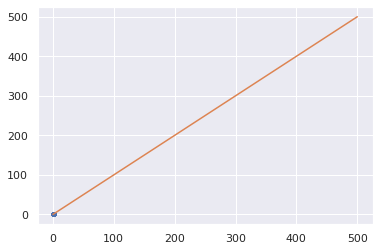

In [ ]:
# plot prediction and actual data
y_pred = model1.predict(x_test) 
plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 500, 100)
y = x
plt.plot(x, y)
plt.show()

In [ ]:
model1.predict(x_test) # Predict unkown data

array([0.75901543, 0.76062619, 0.84431414, ..., 0.72185846, 0.73949878,
       0.86056172])

In [ ]:
x_train[feature_name].unique()
print(tf.__version__)

NameError: ignored

In [ ]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(x_train, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(x_test, y_test, num_epochs=1, shuffle=False)
print(train_input_fn)

<function make_input_fn.<locals>.input_function at 0x7f2fbf5a9ea0>


In [ ]:
#linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est = tf.estimator.LinearClassifier(feature_columns,32)
# We create a linear estimtor by passing the feature columns we created earlier

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 32, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
linear_est.train(train_input_fn)


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.


TypeError: ignored

In [ ]:
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data

clear_output()  # clears consoke output
print(result['accuracy'])  # the result variable is simply a dict of stats about our model

TypeError: ignored